In [29]:
from selenium import webdriver
import time
import re
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
import pandas as pd
from bs4 import BeautifulSoup
import string
import requests
import numpy as np
from IPython.display import display , Markdown 
import pickle
from scrapy.http import TextResponse
import matplotlib as mpl
from collections import Counter
mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from collections import Counter

In [2]:
url1 = 'http://www.jobkorea.co.kr/Top100/?Main_Career_Type=2&Search_Type=1&BizJobtype_Bctgr_Code=0&BizJobtype_Bctgr_Name=%EC%A0%84%EC%B2%B4&Major_Big_Code=0&Major_Big_Name=%EC%A0%84%EC%B2%B4&Edu_Level_Code=9&Edu_Level_Name=%EC%A0%84%EC%B2%B4'
url2 = 'http://www.jobkorea.co.kr/Top100/?Main_Career_Type=1&Search_Type=1&BizJobtype_Bctgr_Code=0&BizJobtype_Bctgr_Name=%EC%A0%84%EC%B2%B4&Major_Big_Code=0&Major_Big_Name=%EC%A0%84%EC%B2%B4&Edu_Level_Code=9&Edu_Level_Name=%EC%A0%84%EC%B2%B4'

req1 = requests.get(url1)
response1 = TextResponse(req1.url, body=req1.text, encoding='utf-8')

req2 = requests.get(url2)
response2 = TextResponse(req2.url, body=req2.text, encoding='utf-8')

per_job_new = response1.xpath('//*[@id="devTypeTab_1"]/div[2]/div[1]/ol/li/div[3]/div[2]/span/text()').extract()
per_job_expert = response2.xpath('//*[@id="devTypeTab_1"]/div[2]/div[2]/ol/li/div[3]/div[2]/span/text()').extract()

In [3]:
url = 'http://www.jobkorea.co.kr/Top100/?Main_Career_Type=1&Search_Type=2&BizJobtype_Bctgr_Code=0&BizJobtype_Bctgr_Name=%EC%A0%84%EC%B2%B4&Major_Big_Code=8&Major_Big_Name=%EC%83%81%EA%B2%BD&Edu_Level_Code=9&Edu_Level_Name=%EC%A0%84%EC%B2%B4'
req = requests.get(url)
response = TextResponse(req.url, body=req.text, encoding='utf-8')

per_major = response.xpath('//*[@id="devTypeTab_1"]/div[2]/div[1]/ol/li/div[3]/div[2]/span/text()').extract()
per_major

['기획·전략·경영',
 '인사·노무·교육',
 '경리·회계·결산',
 '재무·세무·IR 외',
 '마케팅·광고·분석',
 '영업관리·지원·영업기획',
 '시설·빌딩·경비·안전',
 '경리·회계·결산 외',
 '영업관리·지원·영업기획',
 '재무·세무·IR',
 '마케팅·광고·분석',
 '홍보·PR',
 '응용프로그래머 외',
 '재무·세무·IR',
 '제품·서비스영업',
 '바이오·제약·식품',
 '사무·총무·법무 외',
 '인사·노무·교육',
 '마케팅·광고·분석',
 '영업관리·지원·영업기획',
 '화학·에너지·환경 외',
 '제품·서비스영업',
 '생산관리·공정관리·품질관리',
 '약사·한약사·약무보조',
 '법인영업 외',
 '기획·전략·경영',
 '인사·노무·교육',
 '네트워크·서버·보안',
 '구매·자재 외',
 '기획·전략·경영',
 '인사·노무·교육',
 '경리·회계·결산',
 '기획·전략·경영']

In [4]:
url = 'http://www.jobkorea.co.kr/Top100/?Main_Career_Type=1&Search_Type=3&BizJobtype_Bctgr_Code=0&BizJobtype_Bctgr_Name=%EC%A0%84%EC%B2%B4&Major_Big_Code=0&Major_Big_Name=%EC%A0%84%EC%B2%B4&Edu_Level_Code=5&Edu_Level_Name=%EB%8C%80%EC%A1%B8'
req = requests.get(url)
response = TextResponse(req.url, body=req.text, encoding='utf-8')

is_edu_uni =response.xpath('//*[@id="devTypeTab_1"]/div[2]/div[1]/ol/li/div[3]/div[2]/span/text()').extract()
is_edu_uni

['영업관리·지원·영업기획',
 '화학·에너지·환경',
 '생산관리·공정관리·품질관리',
 '제품·서비스영업 외',
 '제품·서비스영업',
 '자동차·조선·기계',
 '생산관리·공정관리·품질관리',
 '해외영업·무역영업 외',
 '영업관리·지원·영업기획',
 '생산관리·공정관리·품질관리',
 '제품·서비스영업',
 '법인영업 외',
 '영업관리·지원·영업기획',
 '화학·에너지·환경',
 '생산관리·공정관리·품질관리',
 '영업관리·지원·영업기획',
 '금융·보험영업',
 '빅데이터·AI(인공지능)',
 '네트워크·서버·보안',
 'IT·솔루션·기술영업',
 '빅데이터·AI(인공지능)',
 '네트워크·서버·보안',
 '기획·전략·경영',
 '인사·노무·교육',
 '경리·회계·결산',
 '기획·전략·경영',
 '상품기획·MD',
 '영업관리·지원·영업기획',
 '마케팅·광고·분석 외',
 '기획·전략·경영']

In [5]:
len(per_job_new) , len(per_major) , len(is_edu_uni) , len(per_job_expert)

(37, 33, 30, 37)

In [6]:
per_job_new = ','.join(per_job_new).replace('·',',').split(',')
per_job_expert = ','.join(per_job_expert).replace('·',',').split(',')
per_major = ','.join(per_major).replace('·',',').split(',')
is_edu_uni = ','.join(is_edu_uni).replace('·',',').split(',')

In [7]:
len(per_job_new) , len(per_major) , len(is_edu_uni) ,  len(per_job_expert)

(104, 92, 80, 99)

In [8]:
job_ls = per_job_new + per_major + is_edu_uni
job_ls = ','.join(job_ls).replace('·',',').split(',')

In [10]:
per_job_new_dict = dict(Counter(per_job_new))
keys = list(per_job_new_dict.keys())
values = list(per_job_new_dict.values())
dict_ = {'job':keys,'count':values}
per_job_new_dict_df = pd.DataFrame(dict_)

In [11]:
per_major_dict = dict(Counter(per_major))
keys = list(per_major_dict.keys())
values = list(per_major_dict.values())
dict_ = {'job':keys,'count':values}
per_major_dict_df = pd.DataFrame(dict_)

In [14]:
is_edu_uni_dict = dict(Counter(is_edu_uni))
keys = list(is_edu_uni_dict.keys())
values = list(is_edu_uni_dict.values())
dict_ = {'job':keys,'count':values}
is_edu_uni_dict_df = pd.DataFrame(dict_)

In [15]:
job_ls_dict = dict(Counter(job_ls))
keys = list(job_ls_dict.keys())
values = list(job_ls_dict.values())
dict_ = {'job':keys,'count':values}
job_ls_df = pd.DataFrame(dict_)

In [16]:
per_job_expert_dict = dict(Counter(per_job_expert))
keys = list(per_job_expert_dict.keys())
values = list(per_job_expert_dict.values())
dict_ = {'job':keys,'count':values}
per_job_expert_dict_df = pd.DataFrame(dict_)

In [17]:
per_job_new_df_20 = per_job_new_dict_df.sort_values(by='count',ascending=False)[:20]
per_major_df_20 = per_major_dict_df.sort_values(by='count',ascending=False)[:20]
is_edu_uni_df_20 = is_edu_uni_dict_df.sort_values(by='count',ascending=False)[:20]
job_ls_df_20 = job_ls_df.sort_values(by='count',ascending=False)[:20]
per_job_expert_dict_df_20 = per_job_expert_dict_df.sort_values(by='count',ascending=False)[:20]

In [18]:
def give_me_figure(df,title):
    plt.figure(figsize=(5,10))
    np.random.seed(0)
    y_pos = np.arange(len(df))
    performance = 3 + 10 * np.random.rand(len(df))
    plt.title(title)
    plt.barh(y_pos, performance)
    plt.yticks(y_pos, df['job'])
    plt.xlabel('x 라벨')
    plt.tight_layout()
    plt.show()

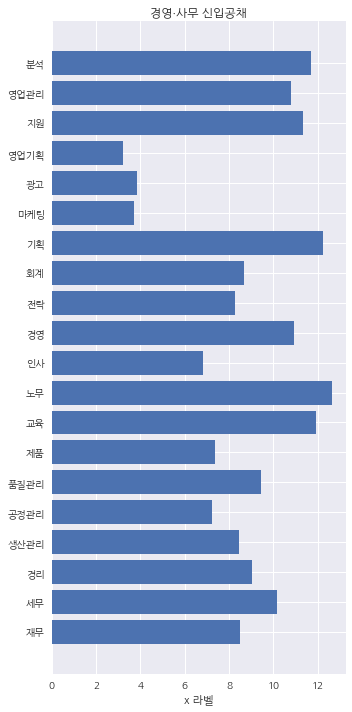

In [30]:
give_me_figure(per_job_new_df_20,'경영·사무 신입공채')

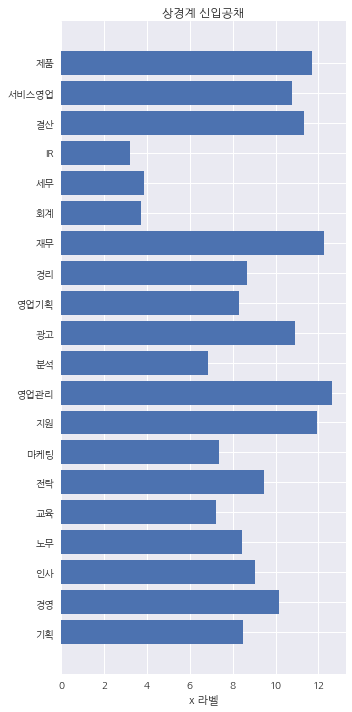

In [31]:
give_me_figure(per_major_df_20,'상경계 신입공채')

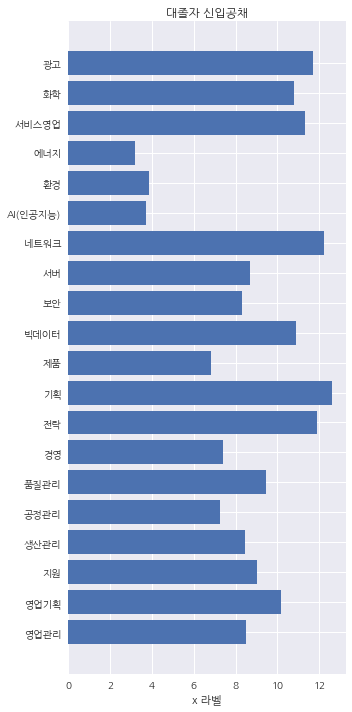

In [32]:
give_me_figure(is_edu_uni_df_20,'대졸자 신입공채')

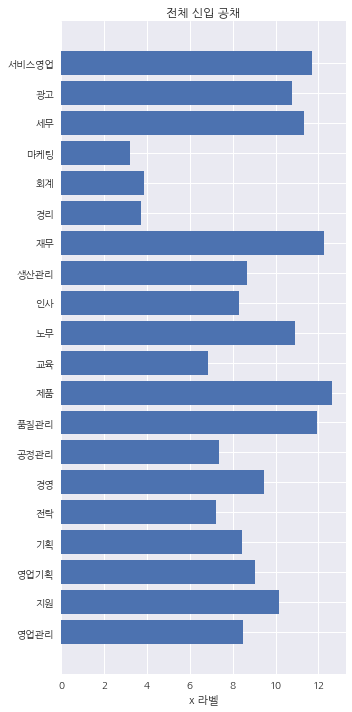

In [33]:
give_me_figure(job_ls_df_20,'전체 신입 공채')

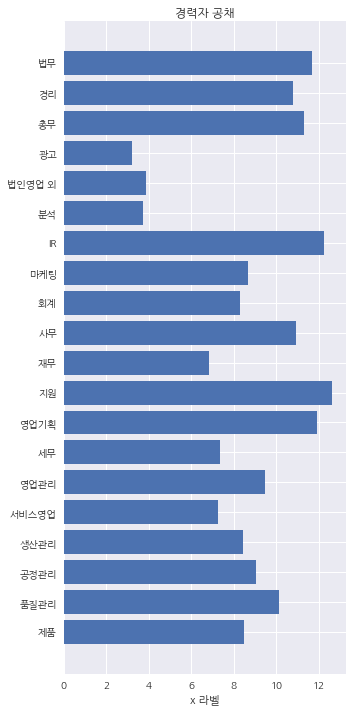

In [38]:
give_me_figure(per_job_expert_dict_df_20,'경력자 공채')

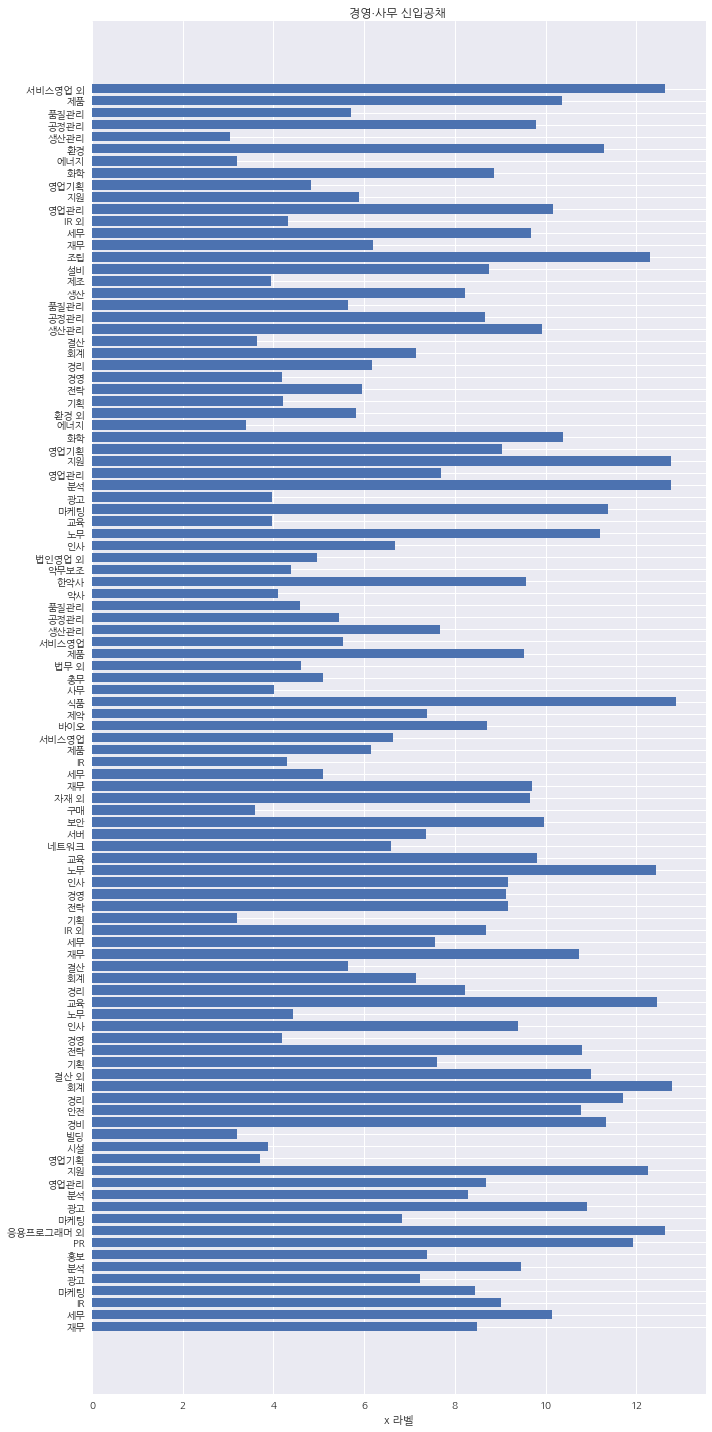

In [81]:
np.random.seed(0)
plt.figure(figsize=(10,20))
y_pos = np.arange(len(per_job_new))
performance = 3 + 10 * np.random.rand(len(per_job_new))

plt.title("경영·사무 신입공채 ")
plt.barh(y_pos, performance)
plt.yticks(y_pos, per_job_new)
plt.xlabel('x 라벨')
plt.tight_layout()
plt.show()

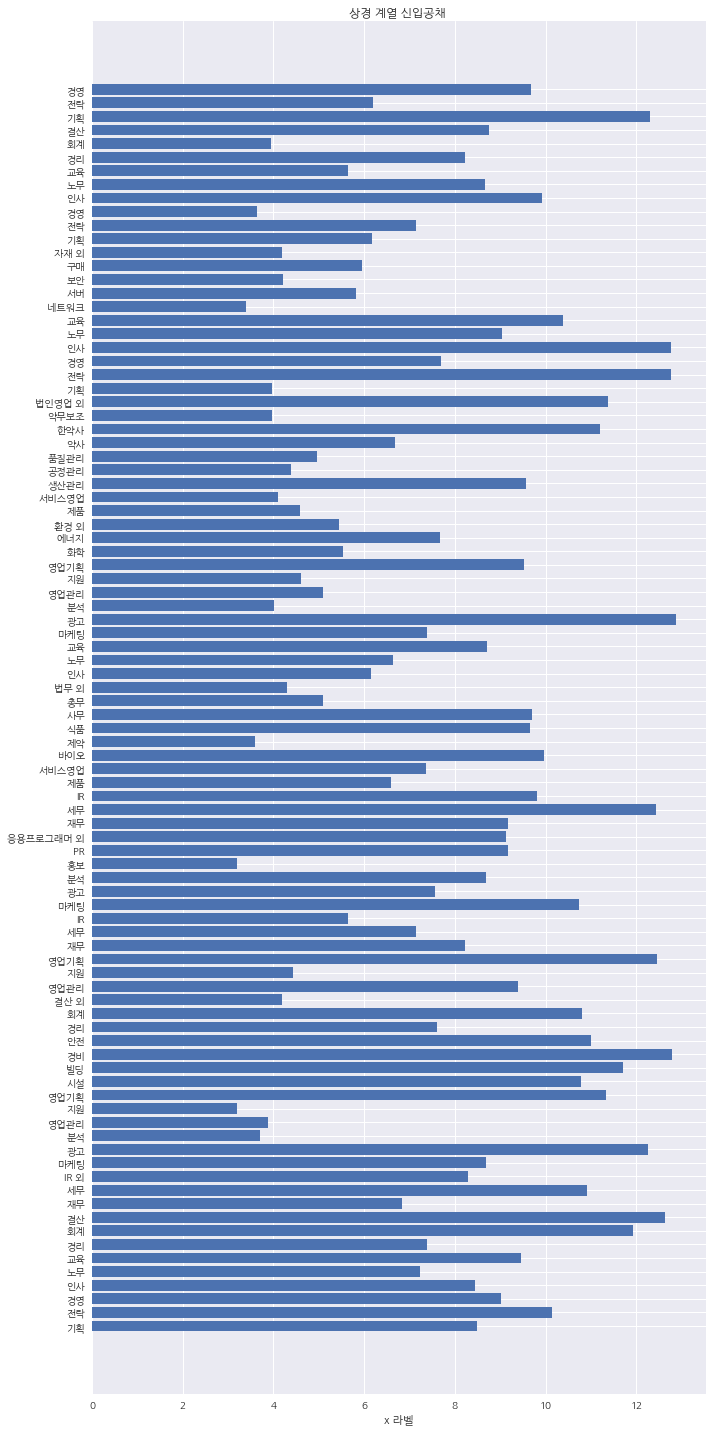

In [82]:
np.random.seed(0)
plt.figure(figsize=(10,20))
y_pos = np.arange(len(per_major))
performance = 3 + 10 * np.random.rand(len(per_major))

plt.title("상경 계열 신입공채 ")
plt.barh(y_pos, performance)
plt.yticks(y_pos, per_major)
plt.xlabel('x 라벨')
plt.tight_layout()
plt.show()

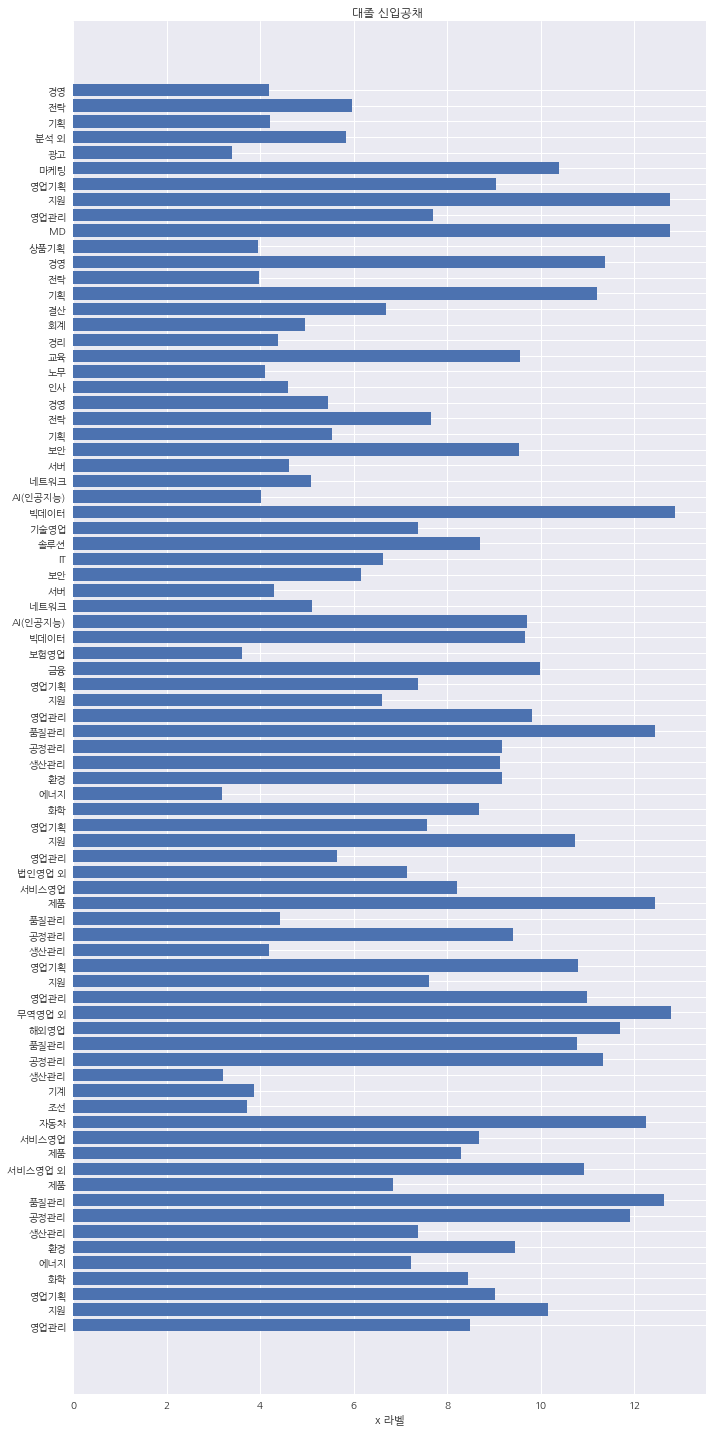

In [84]:
np.random.seed(0)
plt.figure(figsize=(10,20))
y_pos = np.arange(len(is_edu_uni))
performance = 3 + 10 * np.random.rand(len(is_edu_uni))

plt.title("대졸 신입공채 ")
plt.barh(y_pos, performance)
plt.yticks(y_pos, is_edu_uni)
plt.xlabel('x 라벨')
plt.tight_layout()
plt.show()